<a href="https://colab.research.google.com/github/Maysk/data_science_alura/blob/main/deep_learning_parte_1/classificacao_roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports


In [ ]:
import tensorflow
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt


#Carregar Dataset

In [ ]:
dataset = keras.datasets.fashion_mnist

# Explorar os Dados

In [ ]:
((imagens_treino, id_treino), (imagens_teste, id_teste)) = dataset.load_data();

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
nomes_de_classificacoes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

numero_de_classificacoes = len(np.unique(id_treino))

#Exibir os dados

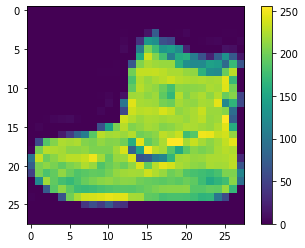

In [ ]:
# for imagem in range(10):
#   plt.subplot(2, 5, imagem+1)
#   plt.imshow(imagens_treino[imagem])
#   plt.title(nomes_de_classificacoes[id_treino[imagem]])

plt.imshow(imagens_treino[0])
plt.colorbar()

# Modelo
- Criando, compilando e treinando o modelo
- Modelo foi normalizado e uma camada dropout foi utilizada (0.2)

In [ ]:
#normalizacao
imagens_treino_modificada = imagens_treino / float(255)

#entrada
layer_0 = keras.layers.Flatten(input_shape=(28,28))

#processamento
layer_hidden = [
  keras.layers.Dense(16, activation=tensorflow.nn.relu),
  keras.layers.Dense(32, activation=tensorflow.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(16, activation=tensorflow.nn.relu),
]

#saida
layer_n = keras.layers.Dense(10, activation=tensorflow.nn.softmax)

#Modelo com duas camadas
modelo = keras.Sequential([layer_0, *layer_hidden, layer_n])


modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy',])

In [ ]:
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 16)                12560     
                                                                 
 dense_9 (Dense)             (None, 32)                544       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 10)                170       
                                                                 
Total params: 13,802
Trainable params: 13,802
Non-trai

In [ ]:
historico = modelo.fit(imagens_treino_modificada, id_treino, verbose=1, epochs=5, steps_per_epoch=3000, validation_split=0.2)

Epoch 1/5
3000/3000 [==============================] - 7s 2ms/step - loss: 0.7051 - accuracy: 0.7454 - val_loss: 0.4698 - val_accuracy: 0.8328
Epoch 2/5
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4830 - accuracy: 0.8276 - val_loss: 0.4499 - val_accuracy: 0.8374
Epoch 3/5
3000/3000 [==============================] - 7s 2ms/step - loss: 0.4435 - accuracy: 0.8456 - val_loss: 0.4315 - val_accuracy: 0.8461
Epoch 4/5
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4224 - accuracy: 0.8508 - val_loss: 0.4157 - val_accuracy: 0.8499
Epoch 5/5
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4088 - accuracy: 0.8545 - val_loss: 0.4028 - val_accuracy: 0.8584


##Visualizando as acurácias de treino e validação por época

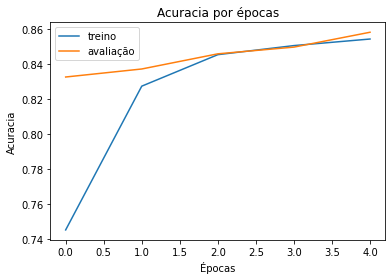

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title("Acuracia por épocas")
plt.xlabel("Épocas")
plt.ylabel("Acuracia")
plt.legend(["treino","avaliação"])

##Visualizando as perdas de treino e validação por época

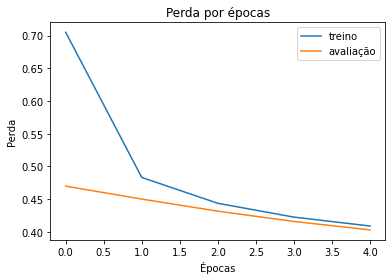

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title("Perda por épocas")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.legend(["treino","avaliação"])

##Salvando e carregando o modelo treinado

In [ ]:
modelo.save('modelo.h5')
modelo_salvo = tensorflow.keras.models.load_model('modelo.h5')

##Avaliando o modelo

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, id_teste, steps=50)

50/50 [==============================] - 0s 3ms/step - loss: 69.7606 - accuracy: 0.8016


In [ ]:
perda_teste, acuracia_teste = modelo_salvo.evaluate(imagens_teste, id_teste, steps=50)

50/50 [==============================] - 0s 2ms/step - loss: 69.7606 - accuracy: 0.8016
